<a href="https://colab.research.google.com/github/Edgar-La/Machine_Learning/blob/main/Minimum_Euclidean_distance_classifier/MEDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# Edgar Lara Arellano
# Clasificador por mínima distancia

In [240]:
#Seccion para importar modulos
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

## PASO 1 y 2
1) Mediante la función make_blobs del paquete sklearn.datasets, genere 200 puntos divididos en 3 clases con desviación estándar de 0.5. Guarde las coordenadas de los 200 puntos en una variable llamada training_data y los indicadores de clase en una variable llamada labels. Grafique un scatter plot usando un color distinto para los puntos en cada una de las 3 clases.

2) Usando la misma función que el paso 1, 3 clases y desviación estándar 0.5, genere 10 puntos nuevos y guárdelos en una variable llamada test_data

In [47]:
#Funcion que llama al metodo -make_blobs()-
def crear_puntos_1(n_MUESTRAS, k_CENTROS, std_dev):
	training_data , labels = make_blobs(n_samples=n_MUESTRAS, centers=k_CENTROS, cluster_std = std_dev, random_state=2)
	return training_data, labels

## Paso 3
Siga el pseudocódigo descrito en las diapositivas adjuntas y calcule los vectores promedio para cada una de las 3 clases. Grafique los vectores promedio sobre el scatter plot del paso anterior, pinte estos vectores de un color distinto al de las 3 clases y aumente el tamaño de estos puntos para que se distingan del resto. Puede usar un marcador o símbolo diferente al default.

In [237]:
#Vectores promedio para cada una de las 3 clases
def Vectores_Promedio(training_data, labels):
  #Hagdo una copia del arreglo de training_data
  training_data_copy = training_data.copy(); training_data_copy = training_data_copy.tolist()

  #Clasifico los puntos(200) en una lista de 3 elementos(3 clases)
  arreglo_aux = [[], [], []]
  for n in range(len(training_data_copy)):
    if labels[n] == 0:
      arreglo_aux[0].append(training_data_copy[n])
    elif labels[n] == 1:
      arreglo_aux[1].append(training_data_copy[n])
    elif labels[n] == 2:
      arreglo_aux[2].append(training_data_copy[n])

  #Uso numpy por facilidad
  for n in range(len(arreglo_aux)):
    arreglo_aux[n] = np.array(arreglo_aux[n])
  
  #Calculo el promedio de c/una de las clases
  vectores_promedio = []
  for n in range(len(arreglo_aux)):
    vectores_promedio.append(np.mean(arreglo_aux[n],  axis=0))
  vectores_promedio = np.array(vectores_promedio)
  #print(vectores_promedio)

  return vectores_promedio
  

## Paso 4
Calcule la distancia Euclidiana de cada uno de los 10 puntos de prueba a los centros de cada clase y guarde estos valores en una matriz de numpy o un dataframe de pandas llamado distance_matrix

In [257]:
def distancia_euclidiana(test_data, vectores_promedio):
  distance_matrix = []
  for n in range(len(test_data)):
    aux = []
    for i in range(len(vectores_promedio)):
      aux.append(np.linalg.norm(test_data[n] - vectores_promedio[i]))
    distance_matrix.append(aux)
  distance_matrix = np.array(distance_matrix)
  #print(distance_matrix)
  return distance_matrix


## Paso 5
Asigne a cada uno de los 10 puntos de prueba la etiqueta de clase correspondiente al centroide con distancia mínima y guarde estas asignaciones (predicted_labels) en una columna extra de la matriz o dataframe.

In [375]:
def asignar_membresia(matrix, test_data):
  #distance_matrix[n] = matrix[n].copy()
  #distance_matrix[n] = distance_matrix[n].tolist()
  predicted_labels = []
  for n in range(len(matrix)):
    minimum = min(distance_matrix[n])
    contador_membresia = 0
    for i in range(len(distance_matrix[n])):
      if minimum == distance_matrix[n][i]:
        predicted_labels.append(contador_membresia)
      else:
        contador_membresia += 1

  predicted_labels = np.array(predicted_labels)
  #print(predicted_labels)

  aux = []
  for n in range(len(predicted_labels)):
    aux.append([predicted_labels[n]])
  aux = np.array(aux)
  #distance_matrix = np.append(distance_matrix, predicted_labels, axis=1)
  extended_distance_matrix = np.append(distance_matrix, aux, axis=1)

  #print(new)
  return predicted_labels, extended_distance_matrix

## Paso 6
Compare los valores de las variables labels contra predicted_labels y cuente el número de aciertos y errores.

In [395]:
def comparar_labels(labels, predicted_labels):
  aciertos = 0; errores = 0;
  for n in range(len(predicted_labels)):
    if labels[n] == predicted_labels[n]:
      aciertos += 1
    else:
      errores+=1
  print('labesl = ', labels)
  print('predicted_labels = ', predicted_labels)
  print('aciertos: ', aciertos)
  print('errores: ', errores)
  return aciertos, errores

# Seccion para llamar a las funciones

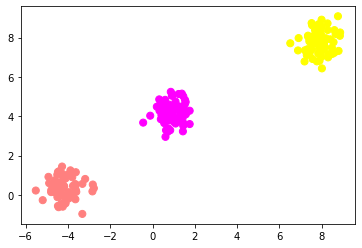

In [363]:
#Paso 1
training_data, labels = crear_puntos(200, 3, 0.5)
plt.scatter(training_data[:,0], training_data[:,1], c=labels, s=50, cmap='spring')

In [ ]:
#Paso 2
test_data, y = crear_puntos(10, 3, 0.5)

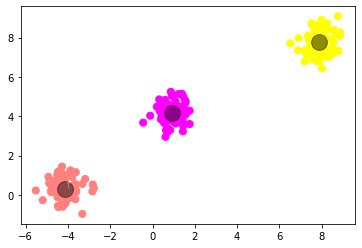

In [369]:
#Paso 3
vectores_promedio = Vectores_Promedio(training_data, labels)
plt.scatter(training_data[:,0], training_data[:,1], c=labels, s=50, cmap='spring')
plt.scatter(vectores_promedio[:,0], vectores_promedio[:,1], c='black', s=250, alpha = .45)

In [371]:
#Paso 4
distance_matrix = distancia_euclidiana(test_data, vectores_promedio)
print(distance_matrix)

[[ 8.07782252 14.34979405  0.61547591]
 [ 0.7222294   6.21530641  8.18845182]
 [ 0.25264229  6.27663054  7.91734627]
 [ 0.19346804  6.21713008  7.99004505]
 [ 7.30926745 13.65692045  0.63461228]
 [ 8.58984126 14.90482543  0.74434556]
 [ 0.32302098  6.21796051  7.97113657]
 [ 7.16901007  0.93475185 14.9132954 ]
 [ 5.61013124  0.84901415 13.44409729]
 [ 6.57290177  0.31267644 14.35020016]]


In [377]:
#Paso 5
predicted_labels, extended_distance_matrix = asignar_membresia(distance_matrix, test_data)
print('predicted_labels = ', predicted_labels)
print('Extended matrix = \n')
print(extended_distance_matrix)

predicted_labels =  [2 0 0 0 2 2 0 1 1 1]
Extended matrix = 

[[ 8.07782252 14.34979405  0.61547591  2.        ]
 [ 0.7222294   6.21530641  8.18845182  0.        ]
 [ 0.25264229  6.27663054  7.91734627  0.        ]
 [ 0.19346804  6.21713008  7.99004505  0.        ]
 [ 7.30926745 13.65692045  0.63461228  2.        ]
 [ 8.58984126 14.90482543  0.74434556  2.        ]
 [ 0.32302098  6.21796051  7.97113657  0.        ]
 [ 7.16901007  0.93475185 14.9132954   1.        ]
 [ 5.61013124  0.84901415 13.44409729  1.        ]
 [ 6.57290177  0.31267644 14.35020016  1.        ]]


In [396]:
#Paso 6
aciertos, errores = comparar_labels(y, predicted_labels)

labesl =  [2 0 0 0 2 2 0 1 1 1]
predicted_labels =  [2 0 0 0 2 2 0 1 1 1]
aciertos:  10
errores:  0


In [ ]:
plt.scatter(test_data[:,0], test_data[:,1], c='black', s=100, alpha = .5)

# Paso extra
Graficar los 10 puntos añadidos

Text(0.5, 1.0, 'Puntos graficados pero aun SIN clasificar')

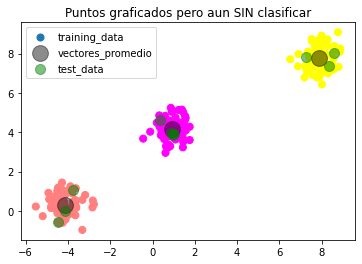

In [387]:
plt.scatter(training_data[:,0], training_data[:,1], c=labels, s=50, cmap='spring', label = 'training_data')
plt.scatter(vectores_promedio[:,0], vectores_promedio[:,1], c='black', s=250, alpha = .45, label = 'vectores_promedio')
plt.scatter(test_data[:,0], test_data[:,1], c='green', s=100, alpha = .5, label = 'test_data')
plt.legend()
plt.title('Puntos graficados pero aun SIN clasificar')

Text(0.5, 1.0, 'Puntos clasificados. Aciertos: 10/10')

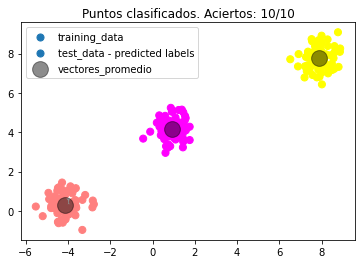

In [397]:
plt.scatter(training_data[:,0], training_data[:,1], c=labels, s=50, cmap='spring', label = 'training_data')
plt.scatter(test_data[:,0], test_data[:,1], c=predicted_labels, s=50,  cmap='spring', label = 'test_data - predicted labels')
plt.scatter(vectores_promedio[:,0], vectores_promedio[:,1], c='black', s=250, alpha = .45, label = 'vectores_promedio')
plt.legend()
plt.title('Puntos clasificados. Aciertos: ' + str(aciertos) + '/' + str(aciertos+errores))